https://iopscience.iop.org/article/10.1088/1742-6596/1697/1/012089/pdf

log of boundry points vs log of all points

Erase lower points and find permieter and area


1. Add implementation to track Square and Perimeter
2. Simulate over many avalances (add one sand)
3. Over multiple lattices

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm

In [4]:
SP_sq = pd.read_csv('1-4999_SquareGrid_SP_2', usecols=[1,2,3])
SP_tri = pd.read_csv('1-7492_TriGrid_SP_2', usecols=[1,2,3])
SP_hex = pd.read_csv('1-2918_HexGrid_SP_2', usecols=[1,2,3])

In [6]:
def uniqu(df):
    df = df[df['Square']!=0]
    unique = []
    for i in range(len(df.index)):
        pair = (df.iloc[i,1],df.iloc[i,2])
        if (pair in unique)==False:
            unique.append(pair)
    return np.array(unique)

In [94]:
squ = uniqu(SP_sq)
tri = uniqu(SP_tri)
hex = uniqu(SP_hex)
print(len(sq),len(tri),len(hex))

166 149 271


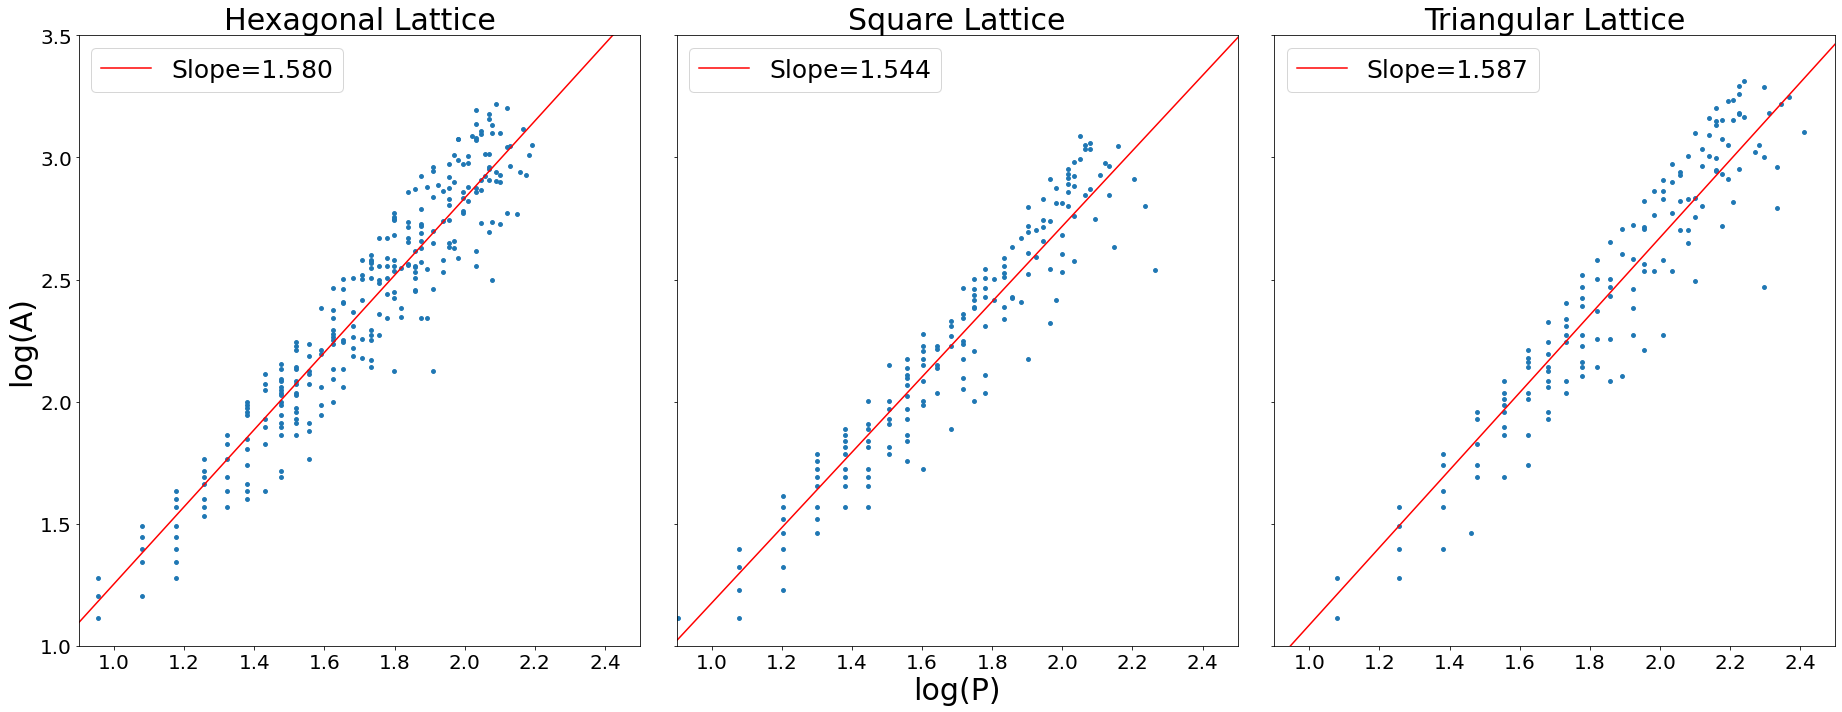

In [97]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(26,10),)

x = np.log10(hex[:,1])
y = np.log10(hex[:,0])
ax1.scatter(x,y,s=15)
x_with_cnst = sm.add_constant(x)
model = sm.OLS(y, x_with_cnst)
results = model.fit()
xf, yf= np.arange(0,10), results.params[1]*xf+results.params[0]
ax1.plot(xf,yf,'red', label="Slope="+str(np.round(results.params[1],3))+'0')
ax1.legend(fontsize=25)
ax1.set_title('Hexagonal Lattice', size=30)
ax1.set_ylabel('log(A)', size=30)
ax1.set_xlim([.9,2.5])
ax1.set_ylim([1,3.5])
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)

x = np.log10(squ[:,1])
y = np.log10(squ[:,0])
ax2.scatter(x,y,s=15)
x_with_cnst = sm.add_constant(x)
model = sm.OLS(y, x_with_cnst)
results = model.fit()
xf, yf= np.arange(0,10), results.params[1]*xf+results.params[0]
ax2.plot(xf,yf,'red',label="Slope="+str(np.round(results.params[1],3)))
ax2.legend(fontsize=25)
ax2.set_title('Square Lattice', size=30)
ax2.set_xlabel('log(P)', size=30)
ax2.tick_params(axis='x', labelsize=20)

x = np.log10(tri[:,1])
y = np.log10(tri[:,0])
plt.scatter(x,y,s=15)
x_with_cnst = sm.add_constant(x)
model = sm.OLS(y, x_with_cnst)
results = model.fit()
xf, yf= np.arange(0,10), results.params[1]*xf+results.params[0]
ax3.plot(xf,yf,'red',label="Slope="+str(np.round(results.params[1],3)))
ax3.legend(fontsize=25)
ax3.set_title('Triangular Lattice', size=30)
ax3.tick_params(axis='x', labelsize=20)

# print("Intercept and slope are:", results.params[0], results.params[1])
fig.tight_layout()
fig.show()
fig.savefig('FractalDimensions.png')

Intercept and slope are: -0.5016172404885731 1.5868420726753194


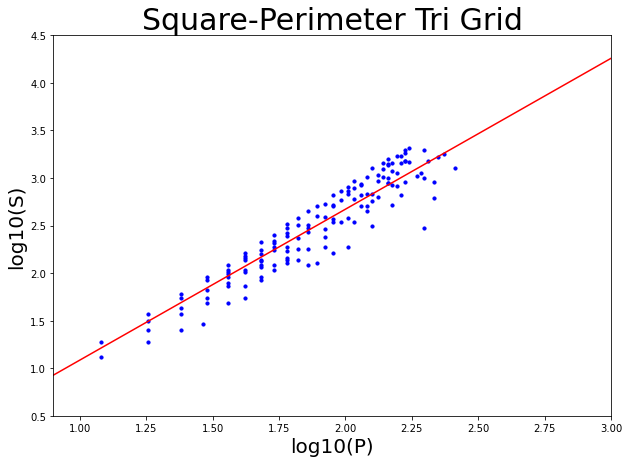

In [24]:
fig = plt.figure(figsize=(10,7))
x = np.log10(tri[:,1])
y = np.log10(tri[:,0])

plt.scatter(x,y,c='blue',s=10)

x_with_cnst = sm.add_constant(x)
model = sm.OLS(y, x_with_cnst)
results = model.fit()
xf = np.arange(0,10)
yf = results.params[1]*xf+results.params[0]
plt.plot(xf,yf,'red')
print("Intercept and slope are:", results.params[0], results.params[1])

plt.title('Square-Perimeter Tri Grid', size=30)
plt.xlabel('log(P)', size=20)
plt.ylabel('log(S)', size=20)
plt.xlim([.9,3])
plt.ylim([.5,4.5])
plt.show()

Intercept and slope are: -0.32609605938458436 1.5798646910533498


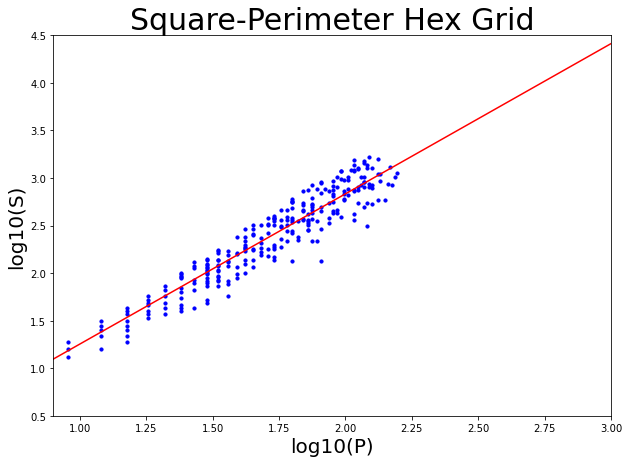

In [25]:
fig = plt.figure(figsize=(10,7))
x = np.log10(hex[:,1])
y = np.log10(hex[:,0])

plt.scatter(x,y,c='blue',s=10)

x_with_cnst = sm.add_constant(x)
model = sm.OLS(y, x_with_cnst)
results = model.fit()
xf = np.arange(0,10)
yf = results.params[1]*xf+results.params[0]
plt.plot(xf,yf,'red')
print("Intercept and slope are:", results.params[0], results.params[1])

plt.title('Square-Perimeter Hex Grid', size=30)
plt.xlabel('log(P)', size=20)
plt.ylabel('log(S)', size=20)
plt.xlim([.9,3])
plt.ylim([.5,4.5])
plt.show()

In [2]:
den_sq = pd.read_csv('1-2199_Densities_Square')
den_tri = pd.read_csv('1-2199_Densities_Tri')
den_sq.head()

,Sand Amount,Density,Boundry Density
0,1.0,1.0,1.0
1,2.0,2.0,2.0
2,3.0,3.0,3.0
3,4.0,0.8,1.0
4,5.0,1.0,1.0


In [3]:
den_sq['Density Cum Proportion'] = den_sq['Density'].cumsum()/(den_sq.index+1)
den_sq['Boundry Density Cum Proportion'] = den_sq['Boundry Density'].cumsum()/(den_sq.index+1)
den_tri['Density Cum Proportion'] = den_tri['Density'].cumsum()/(den_tri.index+1)
den_tri['Boundry Density Cum Proportion'] = den_tri['Boundry Density'].cumsum()/(den_tri.index+1)

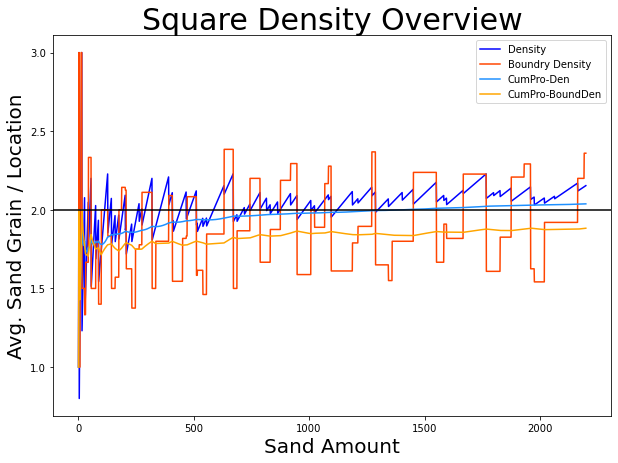

In [8]:
fig = plt.figure(figsize=(10,7))

plt.plot(den_sq['Sand Amount'], den_sq['Density'], label='Density', c='blue')
plt.plot(den_sq['Sand Amount'], den_sq['Boundry Density'], c='orangered', label='Boundry Density')
plt.plot(den_sq['Sand Amount'], den_sq['Density Cum Proportion'], c='dodgerblue', label="CumPro-Den")
plt.plot(den_sq['Sand Amount'], den_sq['Boundry Density Cum Proportion'], c='orange', label="CumPro-BoundDen")
plt.axhline(2, c='black')


plt.title('Square Density Overview', size=30)
plt.xlabel('Sand Amount', size=20)
plt.ylabel('Avg. Sand Grain / Location', size=20)
plt.legend()
plt.show()

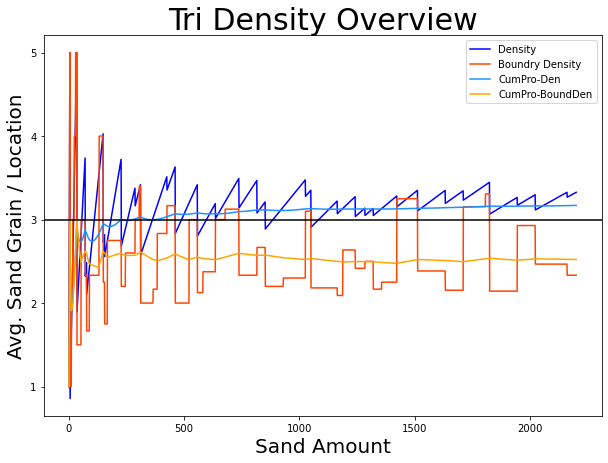

In [5]:
fig = plt.figure(figsize=(10,7))

plt.plot(den_tri['Sand Amount'], den_tri['Density'], label='Density', c='blue')
plt.plot(den_tri['Sand Amount'], den_tri['Boundry Density'], c='orangered', label='Boundry Density')
plt.plot(den_tri['Sand Amount'], den_tri['Density Cum Proportion'], c='dodgerblue', label="CumPro-Den")
plt.plot(den_tri['Sand Amount'], den_tri['Boundry Density Cum Proportion'], c='orange', label="CumPro-BoundDen")
plt.axhline(3, c='black')

plt.title('Tri Density Overview', size=30)
plt.xlabel('Sand Amount', size=20)
plt.ylabel('Avg. Sand Grain / Location', size=20)
plt.legend()
plt.show()

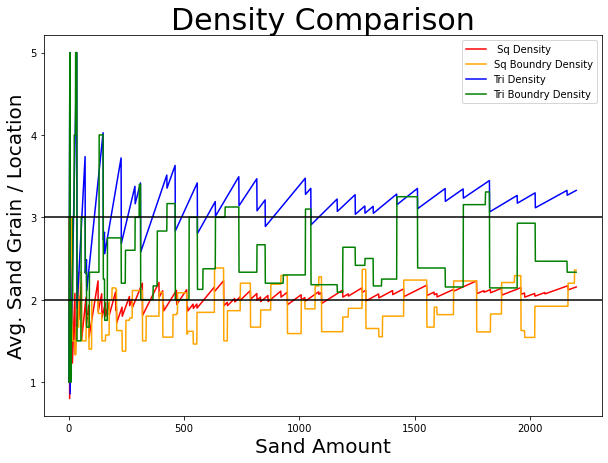

In [6]:
fig = plt.figure(figsize=(10,7))


plt.plot(den_sq['Sand Amount'], den_sq['Density'], label=' Sq Density', c='red')
plt.plot(den_sq['Sand Amount'], den_sq['Boundry Density'], c='orange', label='Sq Boundry Density')
plt.plot(den_tri['Sand Amount'], den_tri['Density'], label='Tri Density', c='blue')
plt.plot(den_tri['Sand Amount'], den_tri['Boundry Density'], c='green', label='Tri Boundry Density')
plt.axhline(3, c='black')
plt.axhline(2, c='black')

plt.title('Density Comparison', size=30)
plt.xlabel('Sand Amount', size=20)
plt.ylabel('Avg. Sand Grain / Location', size=20)
plt.legend()
plt.show()